# Portada

**Course:** CI-0115  
**Professor:** Sebastián Ruiz Blais  
**Semester:** I-2024  
**Group:** 3  
**Students:**  
- Ignacio Redondo Alfaro C06420  
- Braunny Madrigal Barrantes C24436  

---


# Lab_3

"Factores que contribuyen o no a la esperanza de vida de una localidad (país o ciudad)"

---


## 1. (5%)

Cree un nuevo Jupyter notebook y cargue las siguientes bases de datos: 

1. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

2. https://www.kaggle.com/datasets/max-mind/world-cities-database
   
3. https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021 
 


In [1]:
# --------------------------IMPORTING PACKAGES----------------------------------------------------------------------------

import pandas as pd  # the module pandas is getting the nickname 'pd'
from matplotlib import pyplot as plt  # from x package import y module and call it z
import numpy as np

#-------------------------------------------------------------------------------------------------------------------------

#------------------------CREATING A SPEC DATASET BASED ON A GIVEN FILEPATH------------------------------------------------

life_expectancy = pd.read_csv('Life Expectancy Data.csv', sep = ',', skipinitialspace = True)  # life_expectancy is the dataframe obtained from the csv
world_cities = pd.read_csv('worldcitiespop.csv', sep=',', skipinitialspace=True, dtype={'Region': str}) # world_cities is the dataframe obtained from the csv
healthy_lifestyle = pd.read_csv('healthy_lifestyle_city_2021.csv', sep = ',', skipinitialspace = True)  # healthy_lifestyle is the dataframe obtained from the csv

#-------------------------------------------------------------------------------------------------------------------------


## 2. (10%)

Para la base de datos de esperanza de vida por país (life-expectancy-who), 
conserve únicamente el año más reciente. Procure también excluir filas con valores 
vacíos (que contienen null o NaN).  


In [2]:
def main_1(my_data):
  try:
    # Drop rows with missing values
    my_data_cleaned = my_data.dropna()
    # Drop rows with duplicates country
    my_data_cleaned = my_data_cleaned.drop_duplicates(subset='Country', keep='first').copy()
    
    life_expectancy = my_data_cleaned
    print(life_expectancy)
    return life_expectancy
  except Exception as e:
    print("An error occurred:", e)

life_expectancy = main_1(life_expectancy)


          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
16        Albania  2015  Developing              77.8             74.0   
33        Algeria  2014  Developing              75.4             11.0   
49         Angola  2014  Developing              51.7            348.0   
81      Argentina  2014  Developing              76.2            118.0   
...           ...   ...         ...               ...              ...   
2811      Uruguay  2014  Developing              76.8            117.0   
2827   Uzbekistan  2014  Developing              69.2            184.0   
2843      Vanuatu  2014  Developing              71.7            134.0   
2907       Zambia  2014  Developing              61.1            314.0   
2923     Zimbabwe  2014  Developing              59.2            371.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

## 3. (5%)

Para la variable de esperanza de vida, calcule la media, mediana y la 
desviación estándar de todos los países para el año más reciente. Imprímalos en el 
notebook. 


In [3]:
def main_2(my_data):
    try:
        # Calculate the mean, median, and standard deviation of the life expectancy variable
        life_expectancy_stats = my_data['Life expectancy '].describe()
        
        # Print the statistics
        print("Mean life expectancy:", life_expectancy_stats['mean'])
        print("Median life expectancy:", life_expectancy_stats['50%'])  # Median is the 50th percentile
        print("Standard deviation of life expectancy:", life_expectancy_stats['std'])

    except Exception as e:
        print("An error occurred:", e)

main_2(life_expectancy)


Mean life expectancy: 70.52781954887219
Median life expectancy: 72.0
Standard deviation of life expectancy: 8.535694690297833


## 4. (10%)

Realice un histograma con la variable esperanza de vida. Cambie 
progresivamente el número de barras, desde un número pequeño como 5 hasta un 
número grande como 100. Reporte qué es lo que cambia en las distribuciones 
conforme aumenta la cantidad de barras. Escoja qué número de barras le parece 
óptimo y explique por qué. Investigue. 


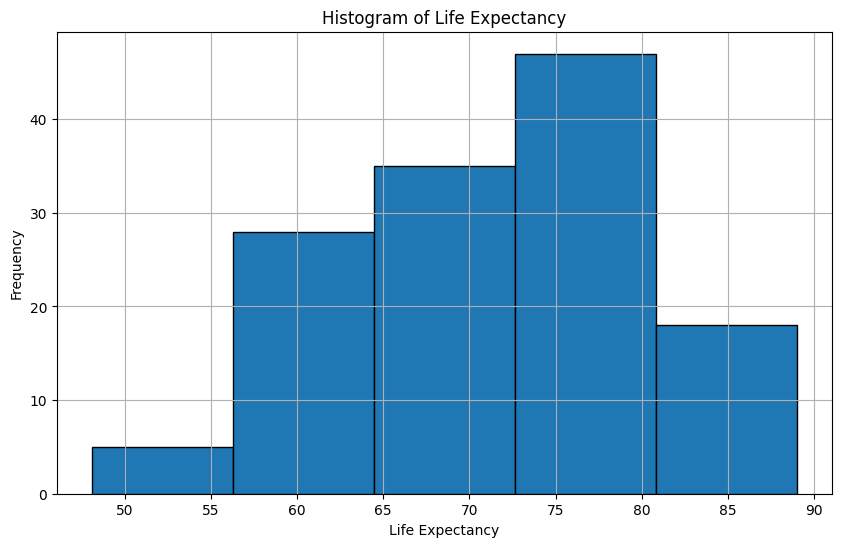

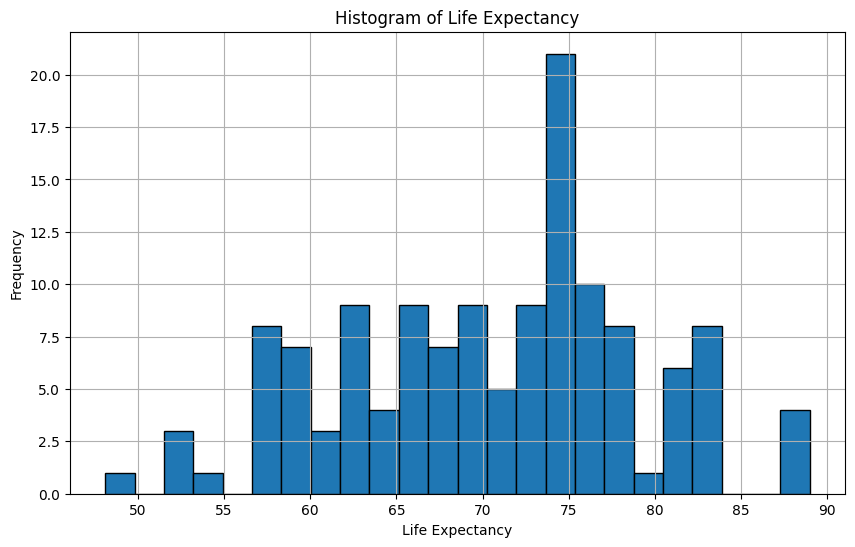

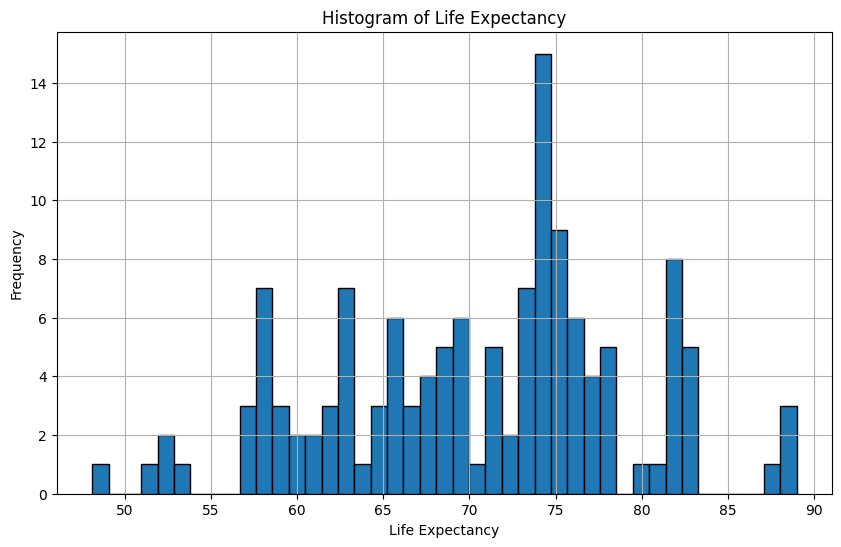

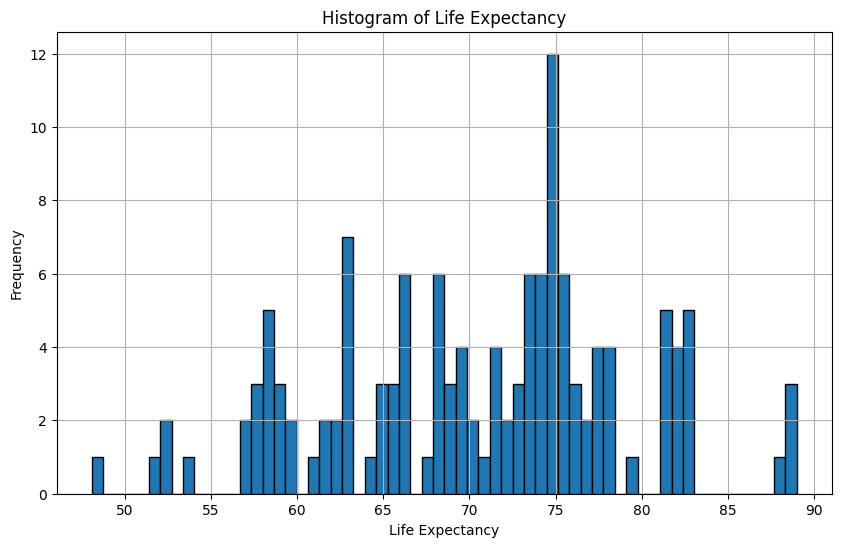

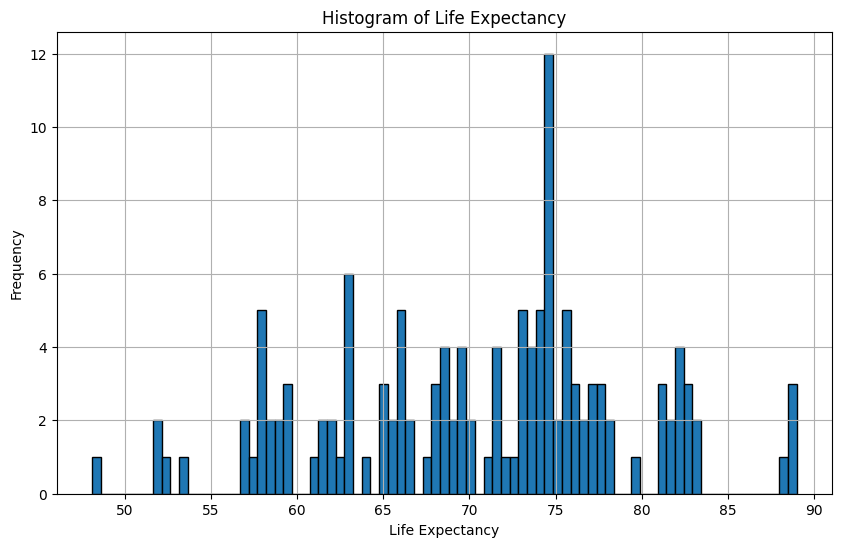

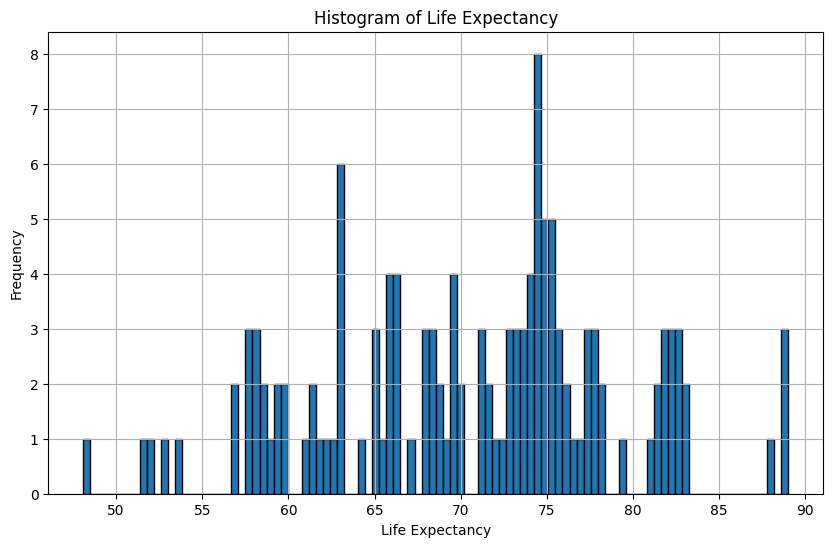

In [4]:

def plot_histogram(data, num_bins):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=num_bins, edgecolor='black')
    plt.title('Histogram of Life Expectancy')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def main_3():
    # Vary the number of bins from 5 to 100
    for num_bins in range(5, 101, 19):
        plot_histogram(life_expectancy['Life expectancy '], num_bins)

main_3()


A medida que aumenta la cantidad de barras en un histograma, la distribución de los datos se representa con mayor detalle.

Para encontrar el numero de barras optimo nos basaremos en la regla de Sturges (fórmula utilizada para determinar el número óptimo de clases o barras en un histograma). Fue propuesta por el estadístico Herbert Sturges en 1926. La fórmula es:


k = 1 + log 2 (n)


 Donde:

- 𝑘 es el número de clases o barras.
 
- 𝑛 es el tamaño de la muestra (número de observaciones).

En este caso:

K = 1 + log 2 (133)

k = 8


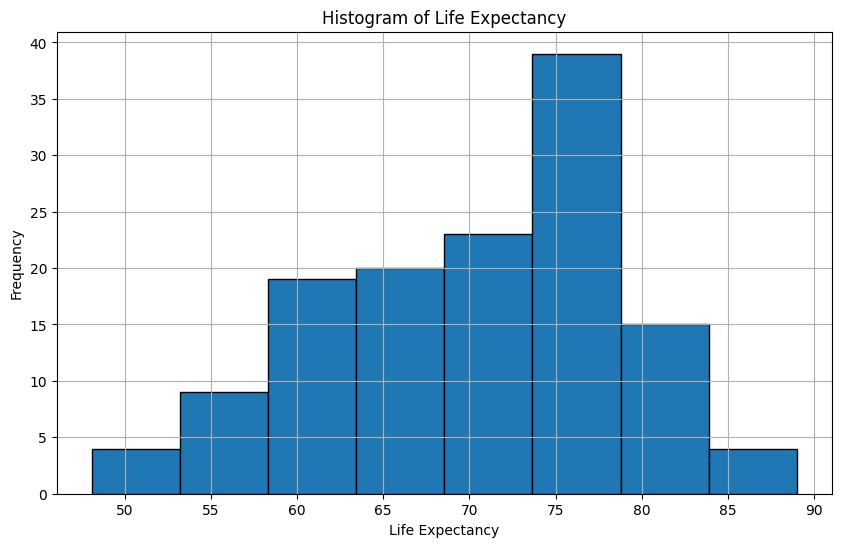

In [5]:
plot_histogram(life_expectancy['Life expectancy '], 8)

## 5. (10%)

En la misma gráfica anterior, coloque la media (𝜇) como una línea vertical y 
la posición de 𝜇 más una desviación estándar (𝜎) y menos una desviación estándar: 𝜇−𝜎  y 𝜇+𝜎.


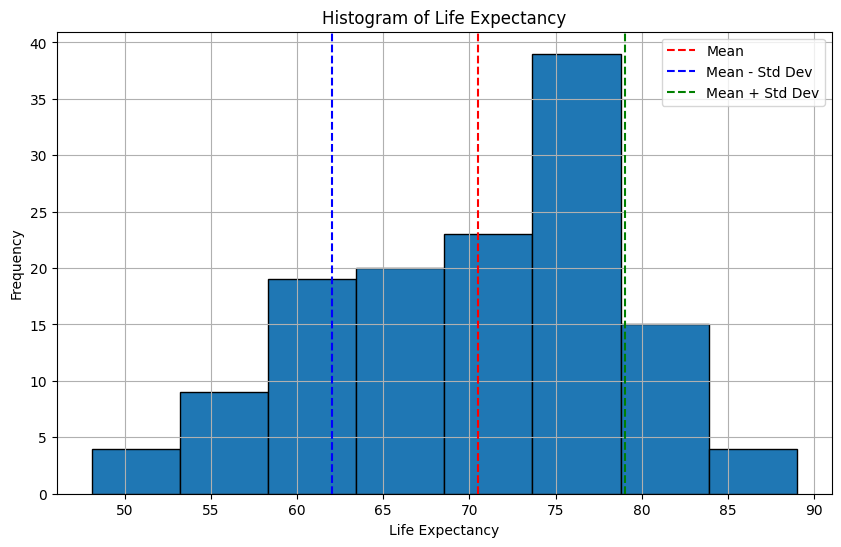

In [6]:
def main_4(data):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=8, edgecolor='black')
    
    mean_value = np.mean(data)
    std_dev_value = np.std(data)
    
    plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
    plt.axvline(mean_value - std_dev_value, color='blue', linestyle='--', label='Mean - Std Dev')
    plt.axvline(mean_value + std_dev_value, color='green', linestyle='--', label='Mean + Std Dev')

    plt.title('Histogram of Life Expectancy')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

main_4(life_expectancy['Life expectancy '])

## 6. (20%)

Investigue cuáles variables tienen una correlación con la esperanza de vida. 
Imprima los valores de la correlación y explique cuáles son las tres variables más 
importantes.  


In [7]:
def main_5():
    # Exclude non-numeric columns
    numerical_columns = life_expectancy.select_dtypes(include=['float64', 'int64']).columns

    # Calculate the correlation matrix
    correlation_matrix = life_expectancy[numerical_columns].corr()

    # Filter only the correlation with life expectancy
    life_expectancy_correlation = correlation_matrix['Life expectancy ']
 
    # Print the correlation values
    print("Correlation with Life Expectancy:")
    print(life_expectancy_correlation)
    print()

    # Exclude 'Life expectancy' from the correlation Series
    life_expectancy_correlation_without_self = life_expectancy_correlation.drop('Life expectancy ')

    # Find the top three largest absolute correlation values in the Series without 'Life expectancy'
    top_three_abs_correlation = life_expectancy_correlation_without_self.abs().nlargest(3)

    # Map the resulting values to their corresponding values in the original correlation matrix
    top_three_correlation = life_expectancy_correlation_without_self[top_three_abs_correlation.index]

    # Print the top three correlation values
    print("Top Three Correlation Values (Excluding 'Life expectancy'):")
    print(top_three_correlation)

main_5()



Correlation with Life Expectancy:
Year                               0.002277
Life expectancy                    1.000000
Adult Mortality                   -0.770869
infant deaths                     -0.198406
Alcohol                            0.527736
percentage expenditure             0.411864
Hepatitis B                        0.244114
Measles                           -0.048982
BMI                                0.556904
under-five deaths                 -0.226036
Polio                              0.370880
Total expenditure                  0.325244
Diphtheria                         0.309768
HIV/AIDS                          -0.619947
GDP                                0.442562
Population                        -0.037573
thinness  1-19 years              -0.427967
thinness 5-9 years                -0.452458
Income composition of resources    0.887897
Schooling                          0.792005
Name: Life expectancy , dtype: float64

Top Three Correlation Values (Excluding 'Life 

## Las tres variables mas importantes son:

### 1. Income composition of resources (Composición de ingresos de recursos):

Esta variable tiene una correlación positiva muy alta con la esperanza de vida, con un valor de correlación de aproximadamente 0.888. Esto sugiere que a medida que la composición de ingresos de los recursos de un país aumenta la esperanza de vida tiende a aumentar.

### 2. Schooling (Escolaridad):

Esta variable también tiene una correlación positiva alta con la esperanza de vida, con un valor de correlación de aproximadamente 0.792. Esto indica que cuanto más alto es el nivel educativo promedio de la población en un país, mayor tiende a ser la esperanza de vida.

### 3. Adult Mortality (Mortalidad adulta):

Esta variable tiene una correlación negativa, lo que significa que a medida que aumenta, la esperanza de vida tiende a disminuir, su correlación es bastante alta en valor absoluto, alrededor de -0.771.


## 7. (40%)

Usando la base de datos world-ci5es-database, y algún si5o o servicio web (o 
biblioteca de Python), cree una nueva columna que corresponda a la al5tud de 
cada ciudad. Como resultado, la base de datos contendrá una variable extra, que 
no se tenía previamente.


In [8]:
import pvlib  # needed to obtain altitudes

def shuffle_and_drop_rows(dataframe):
    new_world_cities = dataframe.sample(frac=1).reset_index(drop=True)  # this will shuffle the dataframe rows
    num_rows = new_world_cities.shape[0]
    new_world_cities.drop(index=range(num_rows-2000), inplace=True)  # keep only the last 2000 rows
    new_world_cities = new_world_cities.reset_index(drop=True)  # reset indexes
    return new_world_cities

def create_list_with_altitudes(df):
    # df == dataframe
    altitudes = []
    num_rows = df.shape[0]
    for i in range (num_rows):
        spec_lat = df.at[i, 'Latitude']  # latitude on row i
        spec_lon = df.at[i, 'Longitude']  # longitude on row i
        spec_alt = pvlib.location.lookup_altitude(spec_lat, spec_lon)  # calculate altitude
        altitudes.append(spec_alt)  # append altitude to the list
    
    return altitudes
        
def main_6():
    new_world_cities = shuffle_and_drop_rows(world_cities)
    altitudes = create_list_with_altitudes(new_world_cities)
    # add new column Altitude containing the values of the list altitudes
    new_world_cities['Altitude'] = altitudes
    return new_world_cities

new_world_cities = main_6()
print(new_world_cities)


     Country                       City                 AccentCity Region  \
0         af                     gagrah                     Gagrah     32   
1         er                      sahli                      Sahli     00   
2         ir                      juqin                      Juqin     36   
3         ru                      peski                      Peski     23   
4         eg  kafr al mansurah al qibli  Kafr al Mansurah al Qibli     10   
...      ...                        ...                        ...    ...   
1995      my       kampong kuala menora       Kampong Kuala Menora     07   
1996      id                    lancing                    Lancing     08   
1997      mx                       roca                       Roca     10   
1998      ru                   bolshiye                   Bolshiye     32   
1999      cn             shangzhengkeng             Shangzhengkeng     30   

      Population   Latitude   Longitude  Altitude  
0            NaN  36.48

# Lab_4

"Análisis de varianza de varios grupos"

---


## 1. (10%)

Trabajando con la base de datos de life-expectancy-who, Investigue a qué 
corresponden las columnas de ‘hepatitis B’, ‘measles’ (sarampión), ' BMI ', 'under-
five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'thinness  1-19 
years', ' thinness 5-9 years', 'Income composition of resources' y para cada una 
explique cuál es el propósito de tenerlas.


- Hepatitis B:

        Esta columna indica el porcentaje de la población infantil que ha sido vacunada contra la Hepatitis B.
        Propósito: Tener esta columna es importante para monitorear la cobertura de vacunación y su relación con la esperanza de vida y la mortalidad infantil. 

- Measles (Sarampión):

        Esta columna indica el número de casos reportados de sarampión en el país.
        Propósito:  Esta columna ayuda a evaluar la incidencia del sarampión y la efectividad de los programas de vacunación.

- BMI (Índice de Masa Corporal):

        Esta columna presenta el promedio del índice de masa corporal (BMI) de la población adulta.
        Propósito: El BMI es un indicador de la salud nutricional de una población. Un BMI alto puede indicar problemas de obesidad, mientras que un BMI bajo puede señalar desnutrición.

- Under-five deaths (Muertes de menores de cinco años):

        Esta columna muestra el número de muertes de niños menores de cinco años por cada 1000 nacidos vivos.
        Propósito: Es un indicador crítico de la salud infantil y de la calidad de los sistemas de salud.

- Polio:

        Esta columna indica el porcentaje de la población infantil que ha sido vacunada contra la poliomielitis.
        Propósito: Este indicador ayuda a evaluar la cobertura de vacunación y el riesgo de brotes de poliomielitis.

- Total expenditure (Gasto total):

        Esta columna representa el gasto total en salud como porcentaje del Producto Interno Bruto (PIB).
        Propósito: Refleja la inversión de un país en su sistema de salud. 

- Diphtheria (Difteria):

        Esta columna indica el porcentaje de la población infantil que ha sido vacunada contra la difteria.
        Propósito: Este indicador ayuda a evaluar la cobertura de vacunación y el control de la enfermedad

- HIV/AIDS (VIH/SIDA):

        Esta columna muestra la prevalencia del VIH/SIDA en la población adulta (porcentaje de personas de 15 a 49 años infectadas con VIH).
        Propósito: Monitorear la prevalencia ayuda a evaluar el impacto de la epidemia y la efectividad de las intervenciones de salud pública.

- Thinness 1-19 years (Delgadez 1-19 años):

        Esta columna indica el porcentaje de la población de entre 1 y 19 años con un índice de masa corporal (BMI) por debajo de lo normal.
        Propósito: Este indicador ayuda a evaluar el estado nutricional de los niños y adolescentes. 

- Thinness 5-9 years (Delgadez 5-9 años):

        Esta columna indica el porcentaje de la población de entre 5 y 9 años con un índice de masa corporal (BMI) por debajo de lo normal.
        Propósito: Similar a la columna anterior, este indicador específico de la franja etaria 5-9 años ayuda a evaluar el estado nutricional de los niños en edad escolar.

- Income composition of resources (Composición del ingreso de recursos):

        Descripción: Esta columna es un índice que mide la desigualdad en la distribución de ingresos en una sociedad.
        Propósito: Una distribución equitativa de los recursos puede mejorar el acceso a servicios de salud y educación, reduciendo las disparidades en salud.

## 2. (10%) 

Utilice diagramas de cajas para visualizar la distribución de las variables 
“esperanza de vida”, “total expenditure” y “schooling”. Inves5gue en Google cómo 
hacer esto (p.ej., hbps://en.wikipedia.org/wiki/Box_plot).


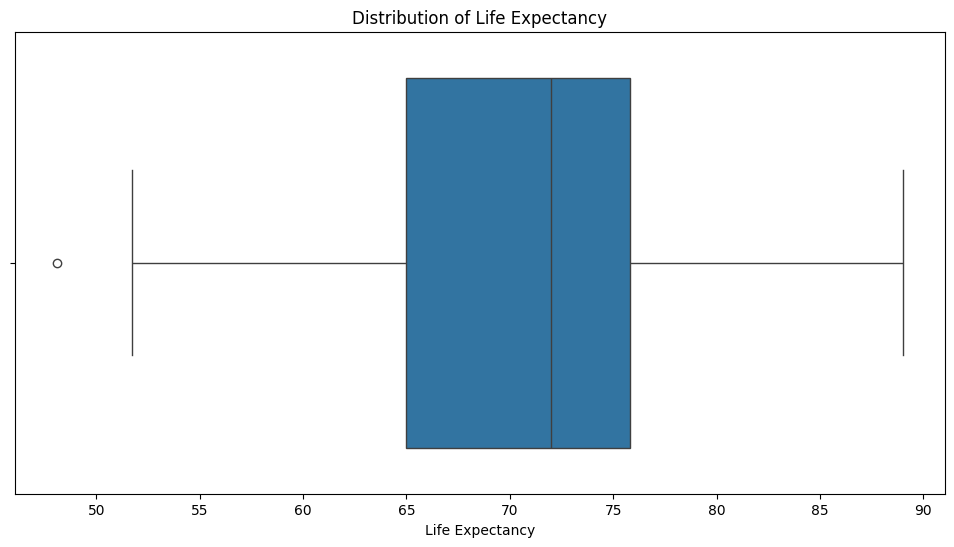

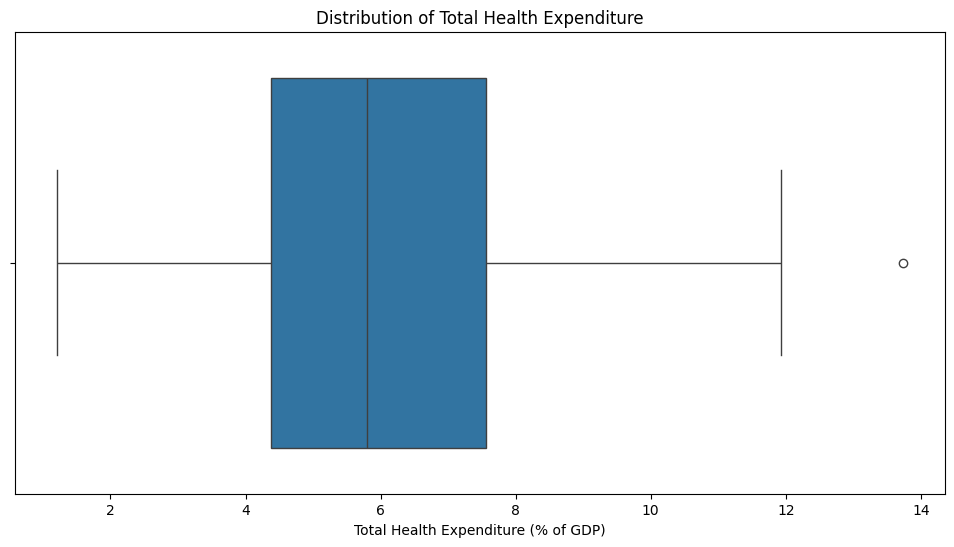

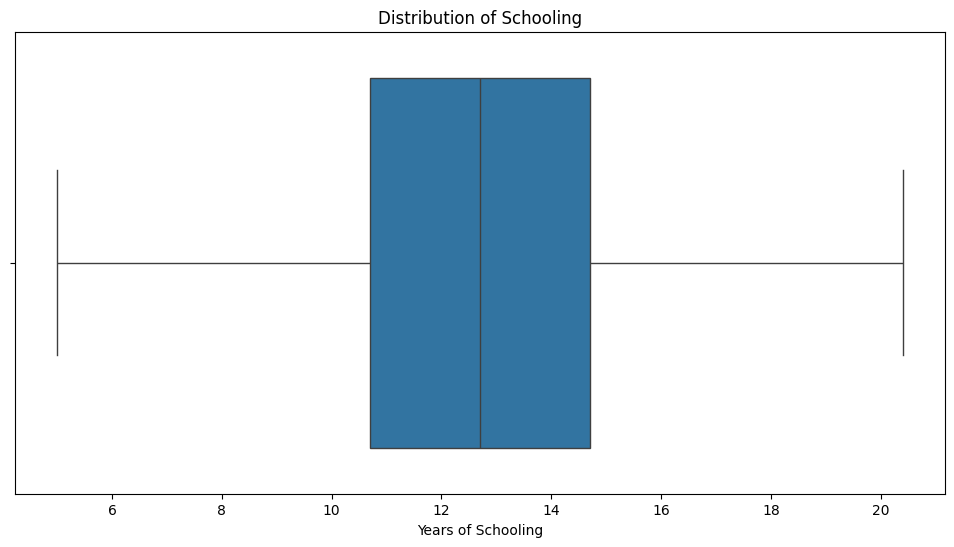

In [9]:
import seaborn as sns

def create_boxplot(data, column, title, xlabel):
    """
    Create a box plot for a specific column of the DataFrame.
    
    :param data: DataFrame containing the data.
    :param column: Name of the column for which the box plot will be created.
    :param title: Title of the plot.
    :param xlabel: Label for the X-axis.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

def main_7():
    # Create box plots for the specified columns
    create_boxplot(life_expectancy, 'Life expectancy ', 'Distribution of Life Expectancy', 'Life Expectancy')
    create_boxplot(life_expectancy, 'Total expenditure', 'Distribution of Total Health Expenditure', 'Total Health Expenditure (% of GDP)')
    create_boxplot(life_expectancy, 'Schooling', 'Distribution of Schooling', 'Years of Schooling')

# Execute the main function
main_7()


## 3. (10%)

Utilice diagramas de dispersión para visualizar las relaciones entre estas 
variables. En total, son 3 diagramas para visualizar las relaciones. Investigue en 
Google (p.ej., hbps://en.wikipedia.org/wiki/Scaber_plot). 


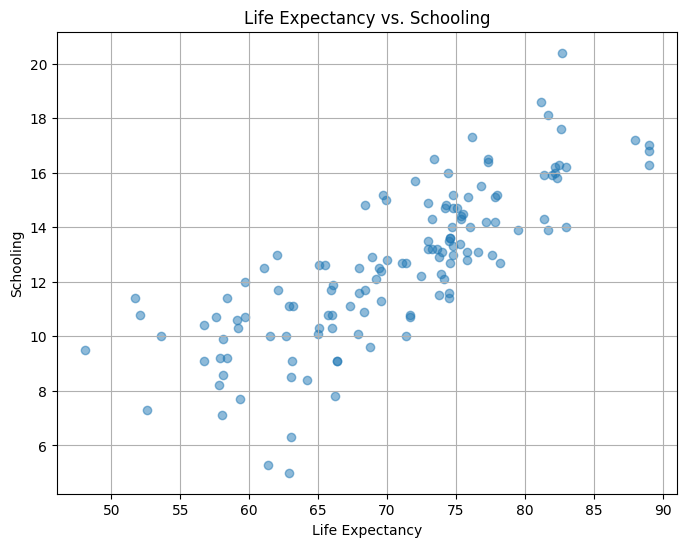

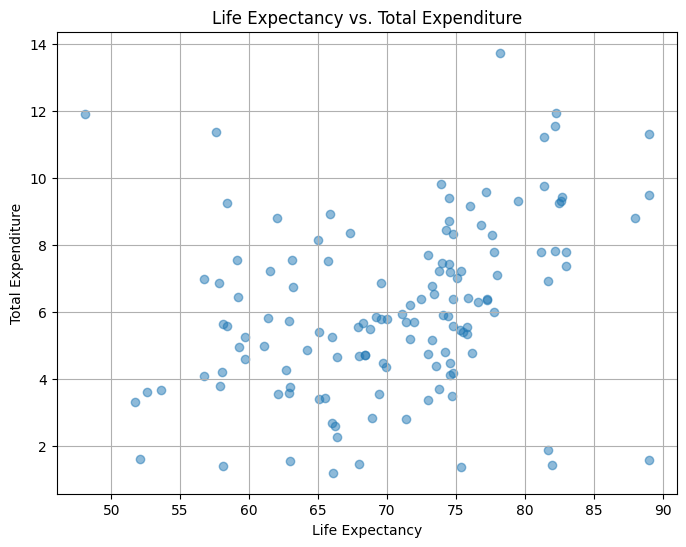

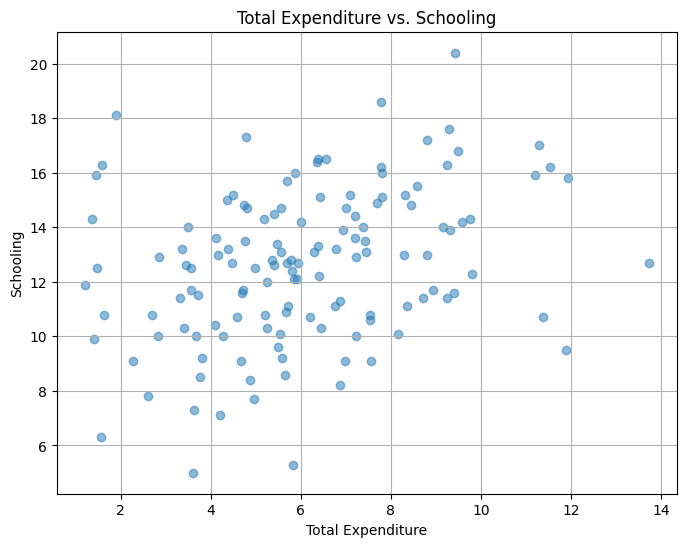

In [10]:
def scatter_plot(x, y, title, xlabel, ylabel):
    """
    Create a scatter plot.
    
    :param x: Data for the X-axis.
    :param y: Data for the Y-axis.
    :param title: Title of the plot.
    :param xlabel: Label for the X-axis.
    :param ylabel: Label for the Y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def main_8():
    # Scatter plot 1: Life expectancy vs. Schooling
    scatter_plot(life_expectancy['Life expectancy '], life_expectancy['Schooling'], 'Life Expectancy vs. Schooling', 'Life Expectancy', 'Schooling')
    
    # Scatter plot 2: Life expectancy vs. Total expenditure
    scatter_plot(life_expectancy['Life expectancy '], life_expectancy['Total expenditure'], 'Life Expectancy vs. Total Expenditure', 'Life Expectancy', 'Total Expenditure')
    
    # Scatter plot 3: Total expenditure vs. Schooling
    scatter_plot(life_expectancy['Total expenditure'], life_expectancy['Schooling'], 'Total Expenditure vs. Schooling', 'Total Expenditure', 'Schooling')

# Execute the main function
main_8()


## 4.

Para nuestro análisis, dividimos el planeta en 3 zonas: la zona tropical, ubicada 
entre el Trópico de Capricornio y el Trópico de Cáncer; el Sur, ubicado por debajo 
del Trópico de Capricornio y el Norte, ubicado por encima del Trópico de Cáncer.

## 4a. (10%)

Prepare los datos y utilice diagramas de cajas para estudiar las 
distribuciones de los países para esperanza de vida, total expenditure y 
schooling en cada una de las zonas planetarias. Debe haber una figura por 
cada variable y cada una debe tener las 3 cajas correspondientes a la zona 
(ver hbps://www.reneshbedre.com/blog/anova.html).  


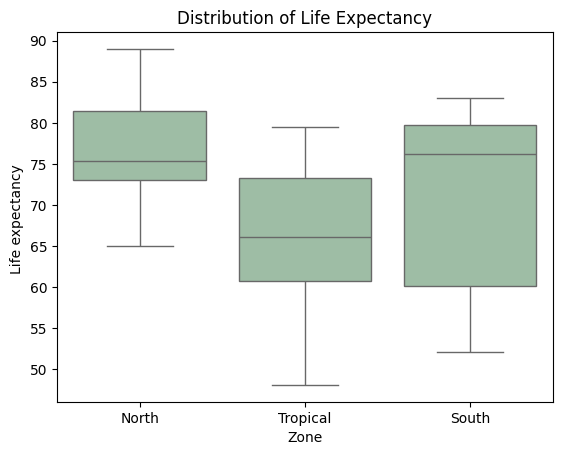

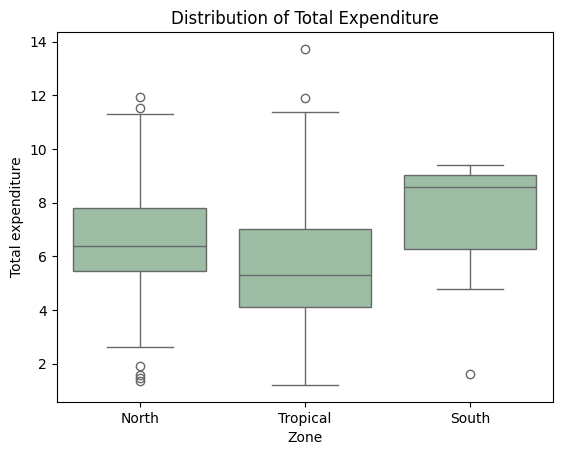

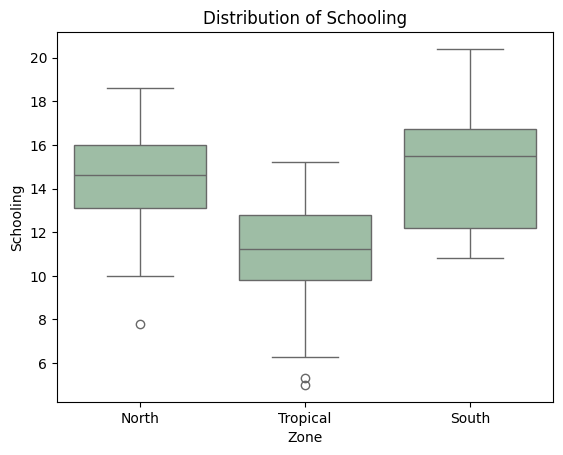

In [11]:

import seaborn as sns  # needed to obtain a plot with multiple boxes

# obtain dataset with unique country codes
country_codes = pd.read_csv('country_codes.csv')
country_codes = country_codes.drop_duplicates(subset='Country')

# Function to assign the geographical zones to countries
def assign_zone(latitude):
    if latitude < 23.5 and latitude > -23.5:
        return 'Tropical'
    elif latitude <= -23.5:
        return 'South'
    else:
        return 'North'

def main_9():
    # dataframe containing only country names, its indexes are the latitudes values of them
    country_codes_aux = country_codes.set_index('Country')['Latitude']
    # add respetive latitude on life_expectancy if the country name is equal
    life_expectancy['Latitude'] = life_expectancy['Country'].map(country_codes_aux)
    # Apply the function to assign zones to each country
    life_expectancy['Zone'] = life_expectancy['Latitude'].apply(assign_zone)
    
    # create first box plot
    ax = sns.boxplot(x='Zone', y='Life expectancy ', data=life_expectancy, color='#99c2a2')
    plt.title("Distribution of Life Expectancy")
    plt.show()
    # create second box plot
    ax = sns.boxplot(x='Zone', y='Total expenditure', data=life_expectancy, color='#99c2a2')
    plt.title("Distribution of Total Expenditure")
    plt.show()
    # create third box plot
    ax = sns.boxplot(x='Zone', y='Schooling', data=life_expectancy, color='#99c2a2')
    plt.title("Distribution of Schooling")
    plt.show()
    
# Execute the main function
main_9()


## 4b. (20%)

Compare las tres variables estudiadas entre estas regiones utilizando 
ANOVA (hbps://en.wikipedia.org/wiki/Analysis_of_variance). Siga el enlace 
de la pregunta anterior para investigar cómo realizar el análisis de varianza 
en Python.  



VAR: LIFE EXPECTANCY
ANOVA F and p value

             df       sum_sq      mean_sq          F        PR(>F)
C(Zone)     2.0  3125.919773  1562.959886  31.300865  8.005823e-12
Residual  130.0  6491.347295    49.933441        NaN           NaN

Tukey HSD

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj   lower    upper  reject
-------------------------------------------------------
 North    South  -6.1267 0.0824 -12.8568  0.6034  False
 North Tropical -10.0634    0.0 -13.0794 -7.0475   True
 South Tropical  -3.9367 0.3402 -10.5696  2.6961  False
-------------------------------------------------------


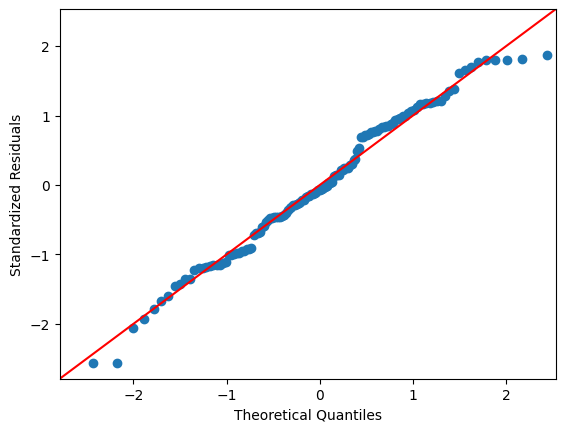

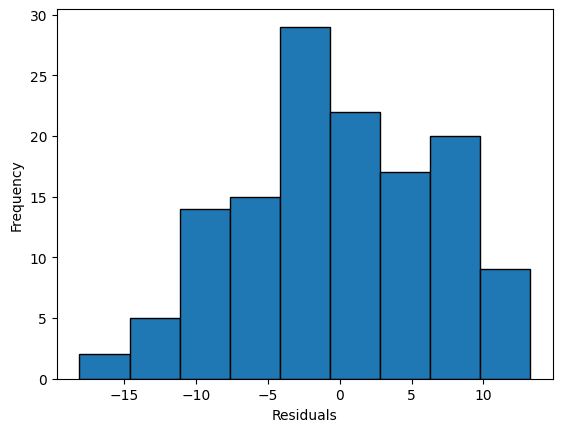

Shapiro-Wilk, w: 0.9823207956285934 , pvalue: 0.08173836003000291 

Bartlett’s test (DRAWN FROM NORMAL DISTRIBUTION)
                 Parameter   Value
0      Test statistics (T)  8.6995
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0129 

Levene’s test (NOT DRAWN FROM NORMAL DISTRIBUTION)
                 Parameter   Value
0      Test statistics (W)  5.7445
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0041 




VAR: TOTAL EXPENDITURE
ANOVA F and p value

             df      sum_sq    mean_sq         F    PR(>F)
C(Zone)     2.0   28.932372  14.466186  2.301859  0.104138
Residual  130.0  816.993667   6.284567       NaN       NaN

Tukey HSD

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 North    South    0.711 0.7604 -1.6766 3.0986  False
 North Tropical  -0.8023 0.1811 -1.8723 0.2676  False
 South Tropical  -1.5133 0.2827 -3.8664 0.

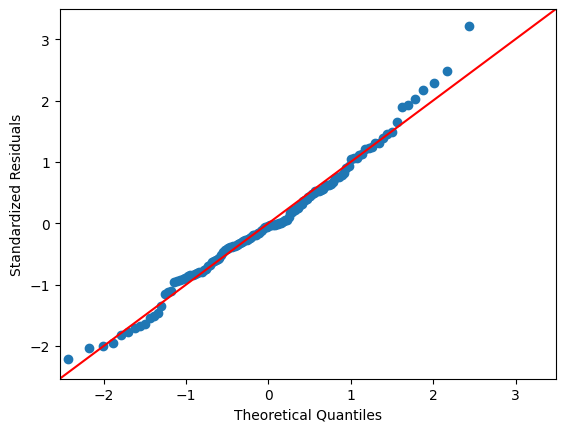

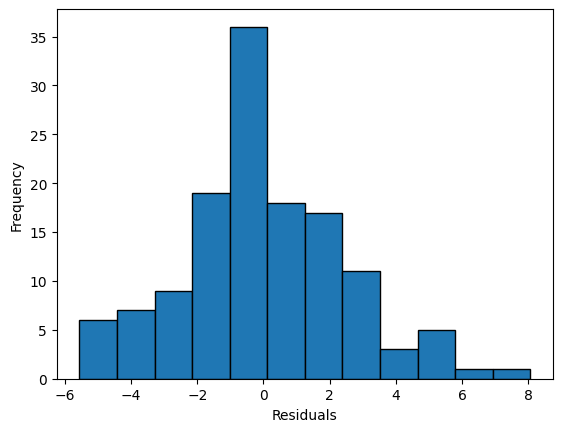

Shapiro-Wilk, w: 0.986993365487974 , pvalue: 0.2413264773263864 

Bartlett’s test (DRAWN FROM NORMAL DISTRIBUTION)
                 Parameter   Value
0      Test statistics (T)  0.4284
1  Degrees of freedom (Df)  2.0000
2                  p value  0.8072 

Levene’s test (NOT DRAWN FROM NORMAL DISTRIBUTION)
                 Parameter   Value
0      Test statistics (W)  0.0682
1  Degrees of freedom (Df)  2.0000
2                  p value  0.9341 




VAR: SCHOOLING
ANOVA F and p value

             df      sum_sq     mean_sq          F        PR(>F)
C(Zone)     2.0  352.251778  176.125889  33.166148  2.300671e-12
Residual  130.0  690.353485    5.310411        NaN           NaN

Tukey HSD

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------
 North    South   0.6447  0.766 -1.5501  2.8395  False
 North Tropical  -3.1801    0.0 -4.1636 -2.1966   True
 South Tropical  -3.8248 0.00

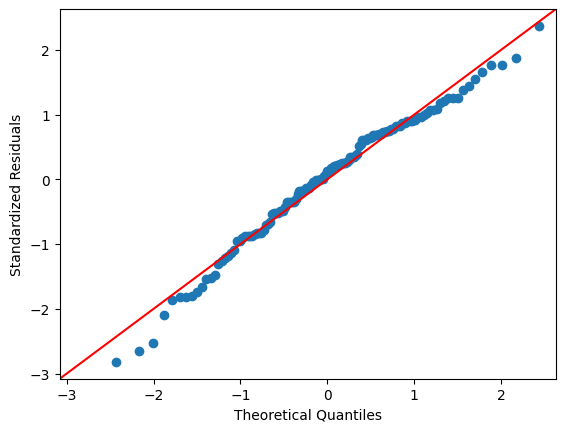

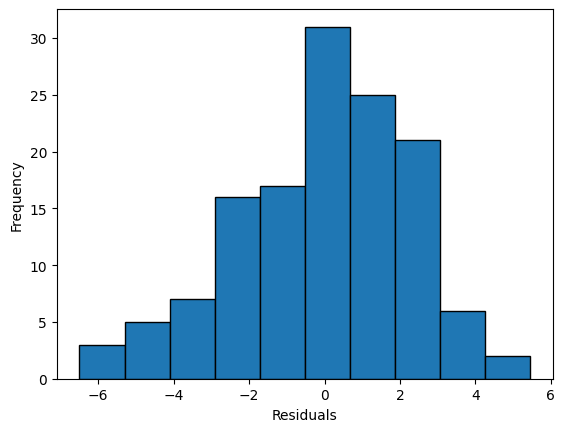

Shapiro-Wilk, w: 0.9822877997809434 , pvalue: 0.08110552446088987 

Bartlett’s test (DRAWN FROM NORMAL DISTRIBUTION)
                 Parameter   Value
0      Test statistics (T)  2.6731
1  Degrees of freedom (Df)  2.0000
2                  p value  0.2628 

Levene’s test (NOT DRAWN FROM NORMAL DISTRIBUTION)
                 Parameter   Value
0      Test statistics (W)  1.3954
1  Degrees of freedom (Df)  2.0000
2                  p value  0.2514 



In [12]:

# get ANOVA table as R like output
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # to do a complete tukey analyisis

def create_clean_life_exp():
    # copy of life_expectancy without unnecesary columns
    life_exp = life_expectancy.drop(columns=['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Latitude'])
    life_exp = life_exp.reset_index(drop=True)  # reset indexes
    life_exp = life_exp.rename(columns={'Life expectancy ': 'Life_Exp', 'Total expenditure': 'Total_Exp'})
    return life_exp
    
def spec_anova_tukey_analysis(data, dependant_var, factor_var):
    # ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
    res = stat()
    res.anova_stat(df=data, res_var=dependant_var, anova_model= f'{dependant_var} ~ C({factor_var})')
    print("ANOVA F and p value\n")
    print(res.anova_summary)  # output
    # perform multiple pairwise comparison (Tukey's HSD)
    tukey = pairwise_tukeyhsd(endog=data[dependant_var], groups=data[factor_var], alpha=0.05)
    print("\nTukey HSD\n")
    print(tukey.summary())  # output
    # Ordinary Least Squares (OLS) model
    model = ols(f'{dependant_var} ~ C({factor_var})', data=data).fit()

    # res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
    # QQ-plot from standardized residuals
    sm.qqplot(res.anova_std_residuals, line='45')
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Standardized Residuals")
    plt.show()
    
    # histogram
    plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
    plt.xlabel("Residuals")
    plt.ylabel('Frequency')
    plt.show()

    # Shapiro-Wilk test can be used to check the normal distribution of residuals
    w, pvalue = stats.shapiro(model.resid)
    print("Shapiro-Wilk, w:", w, ", pvalue:", pvalue, "\n")

    # Bartlett’s test to check the Homogeneity of variances
    print("Bartlett’s test (DRAWN FROM NORMAL DISTRIBUTION)")
    res.bartlett(df=data, res_var=dependant_var, xfac_var=factor_var)
    print(res.bartlett_summary, "\n")

    # Levene’s test can be used to check the Homogeneity of variances
    print("Levene’s test (NOT DRAWN FROM NORMAL DISTRIBUTION)")
    res.levene(df=data, res_var=dependant_var, xfac_var=factor_var)
    print(res.levene_summary, "\n")

def main_10():
    life_exp = create_clean_life_exp()
    
    print("\nVAR: LIFE EXPECTANCY")
    spec_anova_tukey_analysis(life_exp, 'Life_Exp', 'Zone') # ANOVA and Tukey for Life Expectancy
    print("\n\n\nVAR: TOTAL EXPENDITURE")
    spec_anova_tukey_analysis(life_exp, 'Total_Exp', 'Zone') # ANOVA and Tukey for Total Expenditure
    print("\n\n\nVAR: SCHOOLING")
    spec_anova_tukey_analysis(life_exp, 'Schooling', 'Zone') # ANOVA and Tukey for Total Expenditure
 
# Execute the main function
main_10()


## 4c. (10%)

Dé una interpretación a estos resultados, con base en lo que 
investigó previamente en los enlaces proporcionados. Explique cuáles son 
las hipótesis del ANOVA y cómo se interpretan los resultados. ¿Hay 
diferencias en esperanza de vida, gasto total y escolaridad entre zonas del 
mundo?


# Interpretación

## Esperanza de vida

### Hipótesis ANOVA

1. Hipótesis Nula (H0): No hay una diferencia significativa en la esperanza de vida media entre las tres zonas (Norte, Sur, Tropical).
   
2. Hipótesis Alternativa (H1): Hay una diferencia significativa en la esperanza de vida media entre las tres zonas.

### Supuestos ANOVA

1. Normalidad: Usando la prueba de Shapiro-Wilk. Si el valor p es mayor que 0.05, asumimos normalidad. Shapiro-Wilk arrojó un valor p de 0.0817. Por lo tanto, se asume normalidad.

2. Homogeneidad de Varianza: Se usa Bartlett, ya que los datos son normales (según Shapiro-Wilk). La prueba de Bartlett arrojó un valor p de 0,0129, que es menor que 0,05. Por lo tanto, las varianzas no son homogéneas.

3. Independencia: No se prueba explícitamente en ANOVA. Debe ser asumido como cierto si no se tiene la experiencia necesaria para verificar de donde se obtienen las muestras.

### Tabla ANOVA

1. Valor F: El valor F de la tabla ANOVA es 31,3009. Indica la diferencia entre las medias de los grupos.

2. Valor p: El valor p de la tabla ANOVA es menor que 0,05 (8,005823e-12). Esto indica que hay evidencia sólida para rechazar la hipótesis nula.
   
### Tukey HSD

La tabla muestra las comparaciones entre pares de zonas, indicando si la diferencia en las medias es estadísticamente significativa (rechazar) o no (no rechazar).

1. Hay una diferencia significativa en la esperanza de vida media entre las zonas Norte y Tropical, ya que el valor p (0,0) es menor que 0,05.
   
2. Sin embargo, no hay una diferencia significativa entre las zonas Norte y Sur, ni entre las zonas Sur y Tropical.

## Gasto total

### Hipótesis ANOVA

1. Hipótesis Nula (H0): No hay una diferencia significativa en el gasto total medio entre las tres zonas (Norte, Sur, Tropical).

2. Hipótesis Alternativa (H1): Hay una diferencia significativa en el gasto total medio entre las tres zonas.
   
### Supuestos ANOVA

1. Normalidad: Usando la prueba de Shapiro-Wilk. Si el valor p es mayor que 0.05, asumimos normalidad. Shapiro-Wilk arrojó un valor p de 0.2413. Por lo tanto, se asume normalidad.

2. Homogeneidad de Varianza: Se usa Bartlett, ya que los datos son normales (según Shapiro-Wilk). La prueba de Bartlett arrojó un valor p de 0.8072, que es mayor que 0.05. Por lo tanto, las varianzas son homogéneas.

3. Independencia: No se prueba explícitamente en ANOVA. Debe ser asumido como cierto si no se tiene la experiencia necesaria para verificar de donde se obtienen las muestras.

### Tabla ANOVA

1. Valor F: El valor F de la tabla ANOVA es 2.3019. Indica la diferencia entre las medias de los grupos.

2. Valor p: El valor p de la tabla ANOVA es 0.1041, que es mayor que 0.05. Por lo tanto, no tenemos suficiente evidencia para rechazar la hipótesis nula.

### Tukey HSD

Los resultados de la prueba Tukey HSD muestran que no hay diferencias significativas en el gasto total medio entre ningún par de zonas. Todos los valores p son mayores que 0.05.

## Escolaridad

### Hipótesis ANOVA

1. Hipótesis Nula (H0): No hay una diferencia significativa en la escolaridad media entre las tres zonas (Norte, Sur, Tropical).

2. Hipótesis Alternativa (H1): Hay una diferencia significativa en la escolaridad media entre las tres zonas.

### Supuestos ANOVA

1. Normalidad: Usando la prueba de Shapiro-Wilk. Si el valor p es mayor que 0.05, asumimos normalidad. Shapiro-Wilk arrojó un valor p de 0.0811. Por lo tanto, se asume normalidad.

2. Homogeneidad de Varianza: Se usa Bartlett, ya que los datos son normales (según Shapiro-Wilk). La prueba de Bartlett arrojó un valor p de 0.2628, que es mayor que 0.05. Por lo tanto, las varianzas son homogéneas.

3. Independencia: No se prueba explícitamente en ANOVA. Debe ser asumido como cierto si no se tiene la experiencia necesaria para verificar de donde se obtienen las muestras.

### Tabla ANOVA

1. Valor F: El valor F de la tabla ANOVA es 33.1661. Indica la diferencia entre las medias de los grupos.

2. Valor p: El valor p de la tabla ANOVA es 2.300671e-12 (muy cercano a cero). Esto indica que hay evidencia sólida para rechazar la hipótesis nula.

### Tukey HSD

Los resultados de la prueba Tukey HSD muestran que hay diferencias significativas en la escolaridad media entre:

1. Zonas Norte y Tropical (valor p < 0.05)
   
2. Zonas Sur y Tropical (valor p < 0.05)
   
3. No hay diferencia significativa en la escolaridad media entre las zonas Norte y Sur (valor p > 0.05).

## Conclusión

Existen diferencias entre las tres zonas en cuanto a la esperanza de vida y la escolaridad, pero no en cuanto al gasto total. La zona Tropical tiende a tener una esperanza de vida y escolaridad más bajas en comparación con las zonas Norte y Sur, mientras que el gasto total no difiere significativamente entre las zonas. Eso puede signifcar que las variables espereanza de vida y escolaridad se relacionan fuertemente.



## 5.

Para esta pregunta, trabaje con el subconjunto de datos generado en el lab 3 que
contiene información de la altura, correspondiente a entre 1000 y 2000 datos (o
más si así lo desea).

## 5a. (5%)

Grafique la esperanza de vida en función de la altitud usando un
diagrama de dispersión. Comente lo que observa.


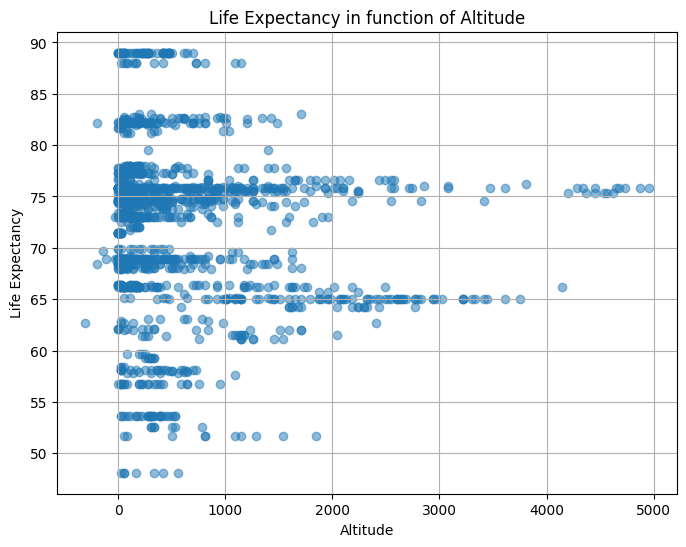

In [13]:

def get_cities_alt():
    life_exp_aux = life_expectancy.copy()  # copy life_expectancy data frame
    
    codes_aux = country_codes.dropna(subset=['ISO-ALPHA-2'])  # drop nan values on the column 'ISO-ALPHA-2'
    codes_aux = codes_aux.set_index('Country')['ISO-ALPHA-2']  # create dataframe of unique column country which indexes are ISO-ALPHA-2
    
    life_exp_aux['Code'] = life_expectancy['Country'].map(codes_aux)  # add each code on life_exp df if the country name is equal
    life_exp_aux = life_exp_aux.dropna(subset=['Code', 'Life expectancy '])  # drop nan values on the selected columns
    life_exp_aux = life_exp_aux.set_index('Code')['Life expectancy ']  # create df of unique column Code which indexes are Life expectancy

    cities_aux = new_world_cities.copy()  # copy new_world_cities dataframe
    cities_aux['Country'] = cities_aux['Country'].str.upper()  # pass the strings on the column Country to uppercase
    cities_aux['Life_Exp'] = cities_aux['Country'].map(life_exp_aux)  # add each Life_exp on cities df if the country code is equal 
    cities_aux = cities_aux.dropna(subset=['Life_Exp'])  # drop nan values on the selected column
    cities_aux = cities_aux.sort_values(by='Altitude', ascending=True)  # sort df based on spec column vales
    cities_aux = cities_aux.reset_index(drop=True)  # reset indexes

    return cities_aux
    
# Get dataframe with the cities, altitude and Life Expectancy
cities_alt = get_cities_alt()
# Draw specific plot
scatter_plot(cities_alt['Altitude'], cities_alt['Life_Exp'], 'Life Expectancy in function of Altitude', 'Altitude', 'Life Expectancy')


## Análisis
Se puede observar que, conforme aumenta la altitud, se van observando menos puntos en la gráfica. Eso significa que hay una cantidad más pequeña de muestras de la esperanza de vida conforme se aumenta la altitud, lo cual indica que hay menos personas habitando en terrenos elevados. Debido a lo anterior, no es posible concluir que la altura juegue un papel relevante para la esperanza de vida, ya que las distintas proporciones de esperanza de vida disminuyen de forma relativamente proporcional conforme se avanza en los quintiles de altitud (no hay outliers notables).


## 5b. (10%)

Para analizar si la altitud influye en la esperanza de vida, estudiamos
las distribuciones de la esperanza de vida correspondiente a las ciudades,
en las categorías de altitud 0-500, 500-1500, 1500-2300 y 2300+. Realice un
diagrama de cajas de la esperanza de vida en las cuatro categorías de
altitud (4 grupos).


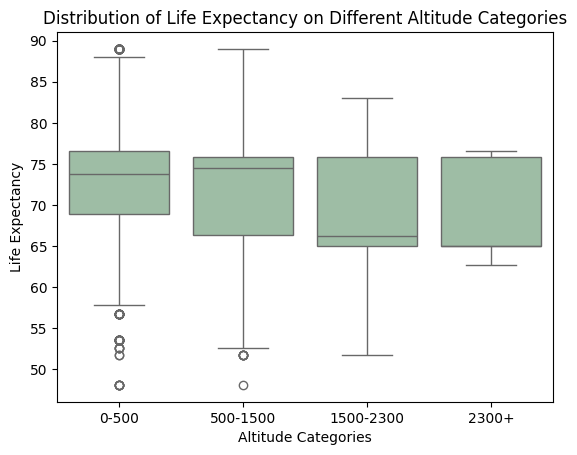

In [17]:

# Function to assign an altitude category based on the altitude param
def assign_alt_category(altitude):
    if altitude < 0:
        return 'NaN'
    elif altitude < 500:
        return '0-500'
    elif altitude < 1500:
        return '500-1500'
    elif altitude < 2300:
        return '1500-2300'
    else:
        return '2300+'
        
# Apply the function to assign altitude categories
cities_alt['Alt_Category'] = cities_alt['Altitude'].apply(assign_alt_category)
cities_alt = cities_alt[cities_alt.Alt_Category != 'NaN']  # drop values initialized with 'NaN' on the selected column

def main_11():
    # create box plot
    ax = sns.boxplot(x='Alt_Category', y='Life_Exp', data=cities_alt, color='#99c2a2')
    plt.title("Distribution of Life Expectancy on Different Altitude Categories")
    plt.xlabel("Altitude Categories")
    plt.ylabel("Life Expectancy")
    plt.show()

# Execute the main function
main_11()


## 5c. (15%)

Utilice ANOVA para comparar las cuatro poblaciones. Explique los
resultados obtenidos. ¿Hay diferencia entre los grupos?


ANOVA F and p value

                     df        sum_sq     mean_sq         F    PR(>F)
C(Alt_Category)     3.0   1619.862174  539.954058  8.936494  0.000007
Residual         1429.0  86341.949843   60.421239       NaN       NaN

Tukey HSD

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    0-500 1500-2300  -3.4198 0.0003 -5.5947 -1.2449   True
    0-500     2300+  -3.0887 0.0075  -5.567 -0.6103   True
    0-500  500-1500  -1.1867 0.0738  -2.448  0.0745  False
1500-2300     2300+   0.3311 0.9932 -2.8324  3.4947  False
1500-2300  500-1500   2.2331  0.067 -0.1029   4.569  False
    2300+  500-1500   1.9019  0.243 -0.7189  4.5228  False
----------------------------------------------------------


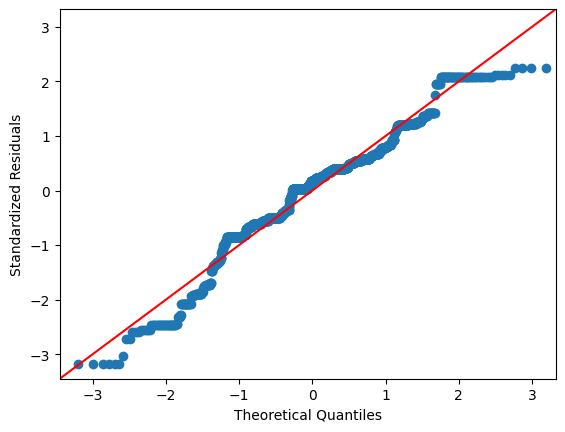

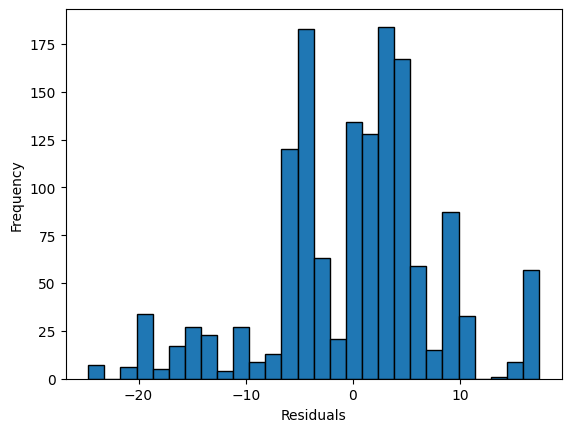

Shapiro-Wilk, w: 0.9660657009064783 , pvalue: 8.020652420095151e-18 

Levene’s test
                 Parameter   Value
0      Test statistics (W)  0.3511
1  Degrees of freedom (Df)  2.0000
2                  p value  0.7092 



In [21]:
def spec_anova_tukey_levene(data, dependant_var, factor_var):
    # ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
    res = stat()
    res.anova_stat(df=data, res_var=dependant_var, anova_model= f'{dependant_var} ~ C({factor_var})')
    print("ANOVA F and p value\n")
    print(res.anova_summary)  # output
    # perform multiple pairwise comparison (Tukey's HSD)
    tukey = pairwise_tukeyhsd(endog=data[dependant_var], groups=data[factor_var], alpha=0.05)
    print("\nTukey HSD\n")
    print(tukey.summary())  # output
    # Ordinary Least Squares (OLS) model
    model = ols(f'{dependant_var} ~ C({factor_var})', data=data).fit()

    # res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
    # QQ-plot from standardized residuals
    sm.qqplot(res.anova_std_residuals, line='45')
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Standardized Residuals")
    plt.show()
    
    # histogram
    plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
    plt.xlabel("Residuals")
    plt.ylabel('Frequency')
    plt.show()

    # Shapiro-Wilk test can be used to check the normal distribution of residuals
    w, pvalue = stats.shapiro(model.resid)
    print("Shapiro-Wilk, w:", w, ", pvalue:", pvalue, "\n")

    # Levene’s test can be used to check the Homogeneity of variances
    print("Levene’s test")
    res.levene(df=data, res_var=dependant_var, xfac_var=factor_var)
    print(res.levene_summary, "\n")

spec_anova_tukey_levene(cities_alt, 'Life_Exp', 'Alt_Category')


# Explicación

## ANOVA de Esperanza de Vida en cuatro poblaciones de Altitud

### Hipótesis ANOVA

1. Hipótesis Nula (H0): No hay una diferencia significativa en los valores medios entre las diferentes categorías de altura.

2. Hipótesis Alternativa (H1): Hay una diferencia significativa en los valores medios entre las diferentes categorías de altura.
   
### Supuestos ANOVA

1. Normalidad: Usando la prueba de Shapiro-Wilk. La prueba arrojó un valor p de 8.020652420095151e-18, que es mucho menor que 0.05. Por lo tanto, rechazamos la hipótesis nula de normalidad, lo que indica que los datos no están distribuidos normalmente. Es importante recordar que la prueba de Shapiro-Wilk no siempre es fiable y este caso podría ser uno de ellos, ya que la gráfica parece estar distribuida de forma semi-normal.

2. Homogeneidad de Varianza: Usando la prueba de Levene. La prueba arrojó un valor p de 0.7092, que es mayor que 0.05. Por lo tanto, las varianzas son homogéneas.

3. Independencia: No se prueba explícitamente en ANOVA. Debe ser asumido como cierto si no se tiene la experiencia necesaria para verificar de donde se obtienen las muestras.

### Tabla ANOVA

1. Valor F: El valor F de la tabla ANOVA es 8.9365. Indica la diferencia entre las medias de los grupos.

2. Valor p: El valor p de la tabla ANOVA es 0.000007 (muy cercano a cero). Esto indica que hay evidencia sólida para rechazar la hipótesis nula, lo que sugiere que hay una diferencia significativa en los valores medios entre las diferentes categorías de altura.

### Prueba Tukey HSD

Los resultados de la prueba Tukey HSD muestran diferencias significativas en los valores medios entre las siguientes categorías:

1. 0-500 y 1500-2300 (valor p < 0.05)
   
2. 0-500 y 2300+ (valor p < 0.05)
   
3. No hay diferencias significativas entre los otros pares de categorías, ya que todos los demás valores p son mayores que 0.05.
   
### Conclusión

Basándonos en los resultados de ANOVA y la prueba Tukey HSD, rechazamos la hipótesis nula. Esto significa que hay una diferencia significativa en los valores medios entre las diferentes categorías de altura. Específicamente, los valores medios para la categoría 0-500 son significativamente diferentes de las categorías 1500-2300 y 2300+, pero no son significativamente diferentes de la categoría 500-1500. Por tanto las altitudes si influyen en la esperanza de vida, pero solo para comparaciones extremas.

Dado que se violó el supuesto de normalidad (y puede que el de independencia), es importante tener en cuenta que, aunque ANOVA es algo robusto frente a desviaciones de la normalidad, los resultados deben interpretarse con precaución.
